In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('Social_Network_Ads.csv')

# from sklearn import preprocessing
# label_encoder=preprocessing.LabelEncoder()
# dataset['Gender']=label_encoder.fit_transform(dataset['Gender'])
# dataset['Gender'].unique()

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [60]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [61]:
y_pred = classifier.predict(X_test)

In [62]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [64]:
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

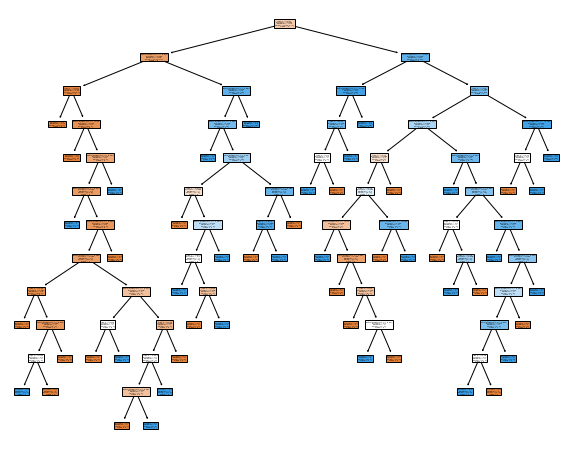

In [65]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(classifier, feature_names=['Age', 'EstimatedSalary'], class_names=['0', '1'], filled=True)
plt.show()

In [66]:
from sklearn.metrics import accuracy_score
print("The accuracy score is:", accuracy_score(y_pred, y_test))

The accuracy score is: 0.91
